### ANALYSIS DATASET COMMERCIAL ACTIVITY

Este notebook nos servirá para observar el dataset "commercial_activity" del proyecto final de Máster : Easy Money

In [115]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [116]:
df_commercial_activity = pd.read_csv(r'G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\commercial_activity_df.csv', index_col=[0])

In [117]:
df_commercial_activity.shape

(5962924, 6)

In [118]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [119]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


Observamos que de la misma forma que en el Dataset de Productos y en el Dataset Sociodemográfico, tenemos 2 columnas en común: pk_cid, pk_partition.

También tenemos 3 columnas categóficas: información relacionada con el canal de entrada, con la fecha de entrada de los clientes, y con el segmento o agrupación al que pertenecen. Y por otro lado una columna booleana: 1 para clientes activos , 0 para clientes inactivos.



In [120]:
df_commercial_activity["active_customer"].value_counts()

0.0    3557573
1.0    2405351
Name: active_customer, dtype: int64

In [121]:
df_commercial_activity.describe()

,pk_cid,active_customer
count,5.962924e+06,5.962924e+06
mean,1.234930e+06,4.033845e-01
std,1.623020e+05,4.905767e-01
min,1.589100e+04,0.000000e+00
25%,1.112532e+06,0.000000e+00
50%,1.231097e+06,0.000000e+00
75%,1.352339e+06,1.000000e+00
max,1.553689e+06,1.000000e+00


Numero de Clientes unicos

In [122]:
len(df_commercial_activity.value_counts(subset='pk_cid'))

456373

Número de clientes por mes

In [123]:
df_commercial_activity.value_counts(subset='pk_partition')

pk_partition
2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
dtype: int64

## Check Nulos

In [124]:
df_commercial_activity.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [125]:
df_commercial_activity['entry_channel'].describe()

count     5829891
unique         68
top           KHE
freq      3113947
Name: entry_channel, dtype: object

In [126]:
df_commercial_activity['entry_channel'].value_counts()

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: entry_channel, Length: 68, dtype: int64

In [127]:
df_commercial_activity['segment'].value_counts(normalize=True)

03 - UNIVERSITARIO    0.669099
02 - PARTICULARES     0.314099
01 - TOP              0.016802
Name: segment, dtype: float64

In [128]:
len(df_commercial_activity["entry_channel"].unique())

69

In [129]:
df_commercial_activity[df_commercial_activity["entry_channel"]=="KHL"]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
4568,1054466,2018-01-28,2015-08-28,KHL,1.0,02 - PARTICULARES
9975,1065734,2018-01-28,2015-09-24,KHL,1.0,03 - UNIVERSITARIO
26287,1015181,2018-01-28,2015-05-09,KHL,0.0,02 - PARTICULARES
27950,1022482,2018-01-28,2018-01-26,KHL,1.0,02 - PARTICULARES
...,...,...,...,...,...,...
13639278,1158228,2019-05-28,2016-08-06,KHL,0.0,03 - UNIVERSITARIO
13641530,1170040,2019-05-28,2016-08-27,KHL,1.0,02 - PARTICULARES
13642335,1173603,2019-05-28,2018-03-12,KHL,1.0,03 - UNIVERSITARIO
13642473,1173675,2019-05-28,2016-09-09,KHL,1.0,02 - PARTICULARES


Tratamiento de nulos

In [130]:
df_commercial_activity["entry_channel"].isnull().sum()/len(df_commercial_activity["entry_channel"]) * 100

2.2310027764901914

In [131]:
df_commercial_activity["segment"].isnull().sum()/len(df_commercial_activity["segment"]) * 100

2.246280516068962

In [132]:
df_commercial_activity["entry_channel"].fillna('UNKNOWN', inplace=True)

In [133]:
df_commercial_activity["segment"].fillna('UNKNOWN',inplace=True)

In [134]:
df_commercial_activity.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

Tratamiento de los dtypes

In [135]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


In [136]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [137]:
df_commercial_activity["pk_partition"]= pd.to_datetime(df_commercial_activity['pk_partition'])

* Remplazamos los clientes que entraron el dia 29 de febrero de 2015 y los de 2019 por el 28 de febrero de cada año. El 29 no existe.

In [138]:
df_commercial_activity.loc[df_commercial_activity["entry_date"] == '2015-02-29', 'entry_date'] = '2015-02-28'

df_commercial_activity.loc[df_commercial_activity["entry_date"] == '2019-02-29', 'entry_date'] = '2019-02-28'



In [139]:
df_commercial_activity["entry_date"]= pd.to_datetime(df_commercial_activity['entry_date'])

In [140]:
df_commercial_activity.loc[df_commercial_activity["entry_date"] == "2015-02-29"]


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


In [141]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 318.5+ MB


In [142]:
df_commercial_activity["active_customer"]= df_commercial_activity["active_customer"].astype("float32")

In [143]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float32       
 5   segment          object        
dtypes: datetime64[ns](2), float32(1), int64(1), object(2)
memory usage: 295.7+ MB


## Check Duplicados

In [144]:
df_commercial_activity.duplicated().sum()

0

## EDA

In [145]:
gb = df_commercial_activity.groupby("pk_cid")

In [146]:
gb.nunique()

,pk_partition,entry_date,entry_channel,active_customer,segment
pk_cid,,,,,
15891,2,1,1,2,2
16063,7,1,1,2,2
16203,6,1,1,2,3
16502,9,1,2,2,2
17457,17,1,1,1,1
...,...,...,...,...,...
1553685,1,1,1,1,1
1553686,1,1,1,1,1
1553687,1,1,1,1,1


In [147]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [148]:
gb.get_group((1375586)).head(20)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1047196,1375586,2018-02-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1681276,1375586,2018-03-28,2018-01-12,KHL,1.0,02 - PARTICULARES
2299297,1375586,2018-04-28,2018-01-12,KHL,1.0,02 - PARTICULARES
2714121,1375586,2018-05-28,2018-01-12,KHL,1.0,02 - PARTICULARES
3343336,1375586,2018-06-28,2018-01-12,KHL,1.0,02 - PARTICULARES
4581564,1375586,2018-07-28,2018-01-12,KHL,1.0,02 - PARTICULARES
5075380,1375586,2018-08-28,2018-01-12,KHL,0.0,02 - PARTICULARES
6258167,1375586,2018-09-28,2018-01-12,KHL,0.0,02 - PARTICULARES
6572487,1375586,2018-10-28,2018-01-12,KHL,0.0,02 - PARTICULARES


<Axes: xlabel='active_customer', ylabel='count'>

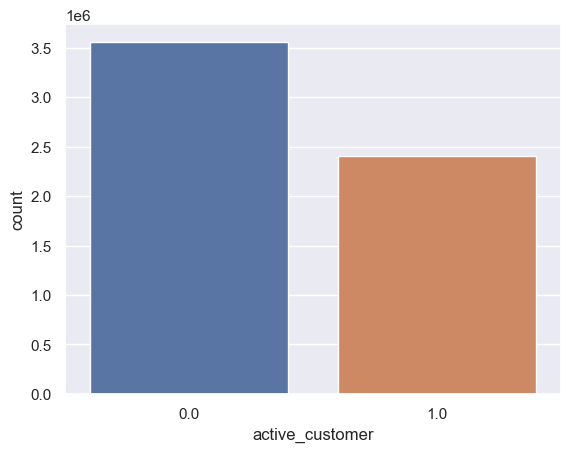

In [149]:
sns.countplot(data=df_commercial_activity, x="active_customer")

### Observación de la actividad de nuestros clientes en nuestra serie temporal:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2018-01-28T00:00:00.000000000'),
  Text(1, 0, '2018-02-28T00:00:00.000000000'),
  Text(2, 0, '2018-03-28T00:00:00.000000000'),
  Text(3, 0, '2018-04-28T00:00:00.000000000'),
  Text(4, 0, '2018-05-28T00:00:00.000000000'),
  Text(5, 0, '2018-06-28T00:00:00.000000000'),
  Text(6, 0, '2018-07-28T00:00:00.000000000'),
  Text(7, 0, '2018-08-28T00:00:00.000000000'),
  Text(8, 0, '2018-09-28T00:00:00.000000000'),
  Text(9, 0, '2018-10-28T00:00:00.000000000'),
  Text(10, 0, '2018-11-28T00:00:00.000000000'),
  Text(11, 0, '2018-12-28T00:00:00.000000000'),
  Text(12, 0, '2019-01-28T00:00:00.000000000'),
  Text(13, 0, '2019-02-28T00:00:00.000000000'),
  Text(14, 0, '2019-03-28T00:00:00.000000000'),
  Text(15, 0, '2019-04-28T00:00:00.000000000'),
  Text(16, 0, '2019-05-28T00:00:00.000000000')])

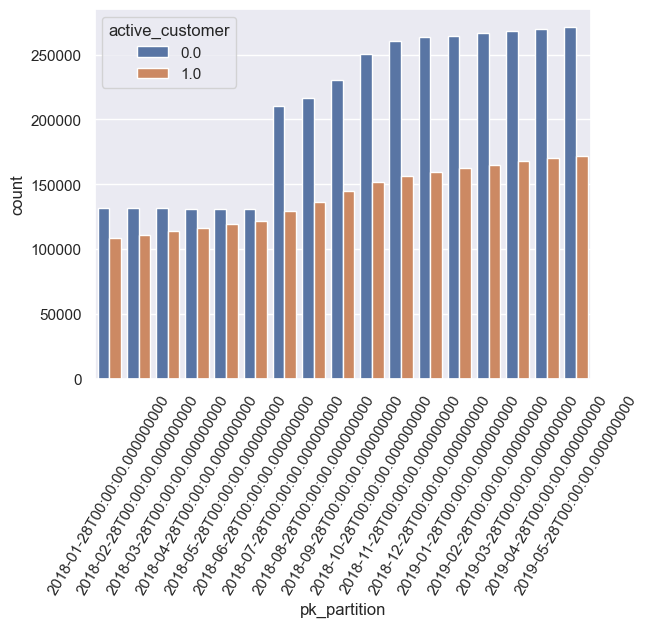

In [150]:
ax = sns.countplot(data=df_commercial_activity, x="pk_partition", hue="active_customer")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '1970-01-01'),
  Text(1, 0, '1970-01-02'),
  Text(2, 0, '1970-01-03'),
  Text(3, 0, '1970-01-04'),
  Text(4, 0, '1970-01-05'),
  Text(5, 0, '1970-01-06'),
  Text(6, 0, '1970-01-07'),
  Text(7, 0, '1970-01-08'),
  Text(8, 0, '1970-01-09'),
  Text(9, 0, '1970-01-10'),
  Text(10, 0, '1970-01-11'),
  Text(11, 0, '1970-01-12'),
  Text(12, 0, '1970-01-13'),
  Text(13, 0, '1970-01-14'),
  Text(14, 0, '1970-01-15'),
  Text(15, 0, '1970-01-16'),
  Text(16, 0, '1970-01-17')])

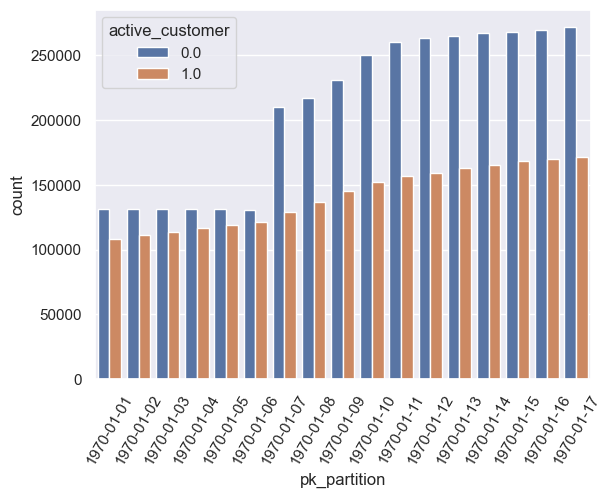

In [151]:
ax = sns.countplot(data=df_commercial_activity, x="pk_partition", hue="active_customer")
date_formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2018-01-28T00:00:00.000000000'),
  Text(1, 0, '2018-02-28T00:00:00.000000000'),
  Text(2, 0, '2018-03-28T00:00:00.000000000'),
  Text(3, 0, '2018-04-28T00:00:00.000000000'),
  Text(4, 0, '2018-05-28T00:00:00.000000000'),
  Text(5, 0, '2018-06-28T00:00:00.000000000'),
  Text(6, 0, '2018-07-28T00:00:00.000000000'),
  Text(7, 0, '2018-08-28T00:00:00.000000000'),
  Text(8, 0, '2018-09-28T00:00:00.000000000'),
  Text(9, 0, '2018-10-28T00:00:00.000000000'),
  Text(10, 0, '2018-11-28T00:00:00.000000000'),
  Text(11, 0, '2018-12-28T00:00:00.000000000'),
  Text(12, 0, '2019-01-28T00:00:00.000000000'),
  Text(13, 0, '2019-02-28T00:00:00.000000000'),
  Text(14, 0, '2019-03-28T00:00:00.000000000'),
  Text(15, 0, '2019-04-28T00:00:00.000000000'),
  Text(16, 0, '2019-05-28T00:00:00.000000000')])

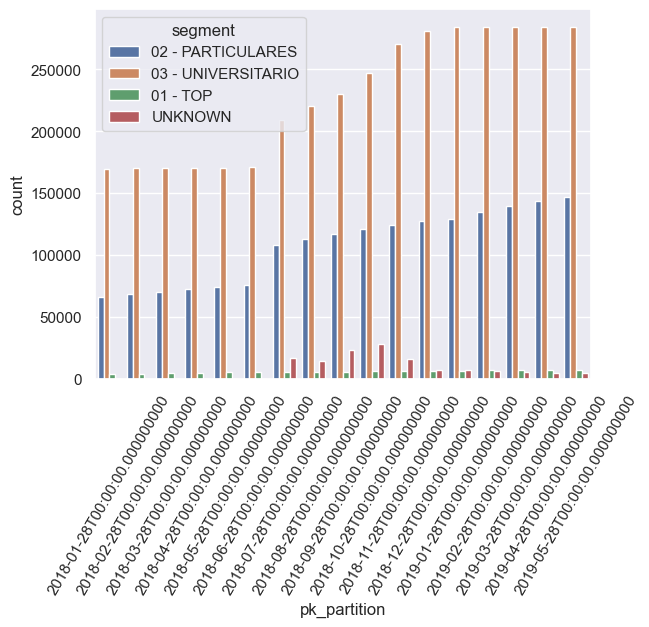

In [152]:
ax = sns.countplot(data=df_commercial_activity, x="pk_partition", hue="segment")
plt.xticks(rotation=60)

### Distribución de clientes activos e inactivos en relación a los segmentos iniciales:

<Axes: xlabel='segment', ylabel='count'>

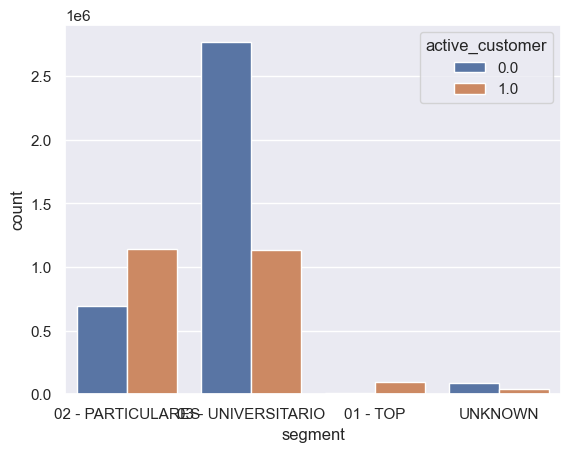

In [153]:
sns.countplot(data=df_commercial_activity, x="segment", hue = "active_customer")

### Distribución de clientes según el canal de entrada a EasyMoney

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'KFA'),
  Text(1, 0, 'KAT'),
  Text(2, 0, 'KFC'),
  Text(3, 0, 'Otros'),
  Text(4, 0, 'KHE'),
  Text(5, 0, 'KHK'),
  Text(6, 0, 'KHM'),
  Text(7, 0, 'KHN'),
  Text(8, 0, 'KHQ')])

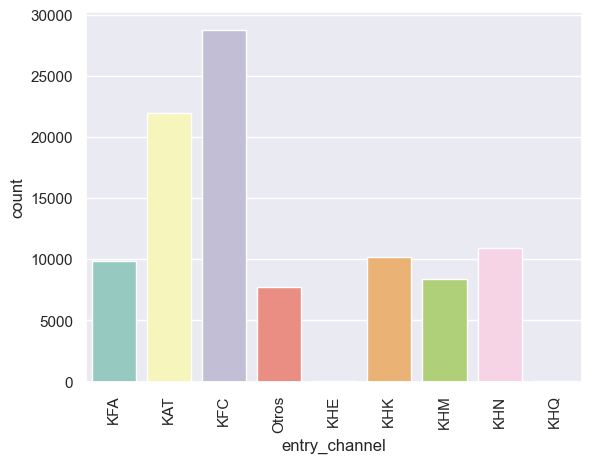

In [154]:
sns.countplot(data=TOP_clients, x="entry_channel", palette="Set3")
plt.xticks(rotation=90)

## POWER BI

Tratamos nuestras variables,  ya sea agrupando aquellas que contienen mucha información o renombrando aquellas que aportan información innecesaria, para poder comunicar nuestros Dashboard en Power BI.

Simplificamos los canales de entrada reduciendo el conjunto a los 10 más representativos.

In [155]:
TOP10_entry_channels = df_commercial_activity["entry_channel"].value_counts().head(10).index.tolist()
TOP10_entry_channels

['KHE', 'KFC', 'KHQ', 'KAT', 'KHK', 'KHM', 'UNKNOWN', 'KHN', 'KFA', 'KHD']

In [156]:
df_commercial_activity.loc[~df_commercial_activity["entry_channel"].isin(TOP10_entry_channels), "entry_channel"] = "Otros"

In [157]:
df_commercial_activity["entry_channel"] = df_commercial_activity["entry_channel"].replace("UNKNOWN", "Otros")

Renombramos las categorías de la variable "segment"

In [158]:
TOP_clients = df_commercial_activity[df_commercial_activity["segment"]=="01 - TOP"]

In [159]:
particulars_clients = df_commercial_activity[df_commercial_activity["segment"]=="02 - PARTICULARES"]

In [160]:
university_clients = df_commercial_activity[df_commercial_activity["segment"]=="03 - UNIVERSITARIO"]

In [161]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,Otros,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


Generamos la variable relacionada con los años de antiguedad: "years_fidelity" 

In [162]:
df_commercial_activity["years_fidelity"] = round((df_commercial_activity["pk_partition"] - df_commercial_activity["entry_date"])/np.timedelta64(1, "Y"),1)

In [163]:
df_commercial_activity.head(10)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,years_fidelity
0,1375586,2018-01-28,2018-01-12,Otros,1.0,02 - PARTICULARES,0.0
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,2.5
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,2.5
5,1050615,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5
6,1050616,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5
7,1050617,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,2.5
8,1050619,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5
9,1050620,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,2.5


In [164]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float32       
 5   segment          object        
 6   years_fidelity   float64       
dtypes: datetime64[ns](2), float32(1), float64(1), int64(1), object(2)
memory usage: 341.2+ MB


Generamos una variable temporal en la que almacenamos la información de los clientes del último més, para obtener la muestra más representativa en relación a a la actividad comercial de nuestros clientes.

In [165]:
df_commercial_activity["pk_partition"].max().to_period("M")

Period('2019-05', 'M')

In [166]:
last_partition = df_commercial_activity[df_commercial_activity["pk_partition"].dt.to_period("M") == df_commercial_activity["pk_partition"].max().to_period("M") ]

In [167]:
last_partition = last_partition.reset_index(drop=True)
df_last_partition = pd.DataFrame(last_partition)
df_last_partition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442995 entries, 0 to 442994
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_cid           442995 non-null  int64         
 1   pk_partition     442995 non-null  datetime64[ns]
 2   entry_date       442995 non-null  datetime64[ns]
 3   entry_channel    442995 non-null  object        
 4   active_customer  442995 non-null  float32       
 5   segment          442995 non-null  object        
 6   years_fidelity   442995 non-null  float64       
dtypes: datetime64[ns](2), float32(1), float64(1), int64(1), object(2)
memory usage: 22.0+ MB


In [168]:
df_commercial_activity_powerby = df_commercial_activity

In [169]:
df_commercial_activity_powerby = pd.DataFrame(df_commercial_activity_powerby)

In [170]:
df_commercial_activity_powerby["active_customer"] = df_commercial_activity_powerby["active_customer"].replace({0:"Inactivo", 1:"Activo"})
df_commercial_activity_powerby["active_customer"].value_counts()

Inactivo    3557573
Activo      2405351
Name: active_customer, dtype: int64

In [171]:
df_commercial_activity_powerby["years_fidelity"].value_counts()

0.6    218467
0.5    216638
0.4    211998
1.5    204556
0.3    195406
1.6    195073
2.5    188419
1.4    186039
1.3    185830
0.2    184009
0.7    183337
2.6    179572
0.8    177238
0.1    171370
1.7    171223
2.4    168297
2.3    164465
1.2    156602
2.7    155707
1.8    153817
1.1    151255
1.0    146279
0.9    145128
2.8    141686
2.2    141146
1.9    133439
2.1    132697
2.0    132484
2.9    120886
3.1    120060
3.2    119125
3.4    114401
3.3    113096
3.0    113088
0.0    102126
3.5    100695
3.6     94114
3.7     65179
3.8     48709
3.9     21143
4.0     14323
4.1     10872
4.2      7867
4.3      3820
4.4      1243
Name: years_fidelity, dtype: int64

Generamos una nueva variable que nos agrupe en función de los años de antiguedad nuestros clientes para poder filtrar posteriormente facilmente la información.

In [172]:
ranges =[0,1,2,3,4, float("inf")]

In [173]:
labels = ["menos de 1 año", "entre 1 y 2 años", "entre 2 y 3 años", "entre 3 y 4 años", "más de 4 años"]

In [174]:
df_commercial_activity_powerby["years_fidelity_category"] = pd.cut(df_commercial_activity_powerby["years_fidelity"], bins=ranges, labels=labels, right=False)

In [175]:
df_commercial_activity_powerby.head(15)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,years_fidelity,years_fidelity_category
0,1375586,2018-01-28,2018-01-12,Otros,Activo,02 - PARTICULARES,0.0,menos de 1 año
1,1050611,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
2,1050612,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
3,1050613,2018-01-28,2015-08-10,KHD,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
4,1050614,2018-01-28,2015-08-10,KHE,Activo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
5,1050615,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
6,1050616,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
7,1050617,2018-01-28,2015-08-10,KHE,Activo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
8,1050619,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años
9,1050620,2018-01-28,2015-08-10,KHE,Inactivo,03 - UNIVERSITARIO,2.5,entre 2 y 3 años


Renombramos la información relacionada con el segmento.

In [176]:
df_commercial_activity_powerby["segment"] = df_commercial_activity["segment"].replace({
    "03 - UNIVERSITARIO":"Universitarios",
    "02 - PARTICULARES": "Particulares",
    "01 - TOP": "Top",
    "UNKNOWN": "Universitarios"})

In [177]:
df_commercial_activity_powerby["segment"].value_counts()

Universitarios    4034110
Particulares      1830875
Top                 97939
Name: segment, dtype: int64

# Guardar en Pickle 

In [179]:
import os
directorio = r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\pickles"
df_commercial_activity_powerby.to_pickle(os.path.join(directorio,"commercial_activity.pickle"))

# Guardar en CSV

In [180]:
df_commercial_activity_powerby.to_csv(r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\dataset_powerBI\df_commercial_activity_all_partition.csv")

In [181]:
df_last_partition.to_csv(r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\dataset_powerBI\df_commercial_activity_last_partition.csv")

In [182]:
df_commercial_activity.to_csv(r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\csv_limpios\commercial_activity_df_clean")

In [183]:
import os
directorio = r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\pickles"
df_commercial_activity.to_pickle(os.path.join(directorio,"commercial_activity.pickle"))